In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [134]:
from sklearn.datasets import make_classification
##generating data using sklearn
x, y = make_classification(
n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
n_classes=2, n_clusters_per_class=2, weights=[0.98, ], class_sep=0.5,
scale=1.0, shuffle=True, flip_y=0, random_state=0
)


In [135]:
x.shape

(1000, 2)

In [136]:
y.shape

(1000,)

In [137]:
usage = [ 120, 123, 124, 119, 196,
121, 118, 117, 500, 132
]


In [138]:
cutoff = pd.Series(usage).quantile(0.95)

In [139]:
cutoff

363.1999999999997

In [140]:
pd.Series(usage) > cutoff

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool

In [141]:
vals = pd.Series(x[:, 0]) > pd.Series(x[:, 0]).quantile(0.95)
vals[vals == True]

15     True
17     True
19     True
40     True
43     True
66     True
83     True
85     True
114    True
129    True
139    True
164    True
215    True
243    True
281    True
292    True
303    True
326    True
345    True
449    True
511    True
530    True
551    True
583    True
584    True
588    True
605    True
630    True
631    True
662    True
695    True
702    True
728    True
729    True
734    True
752    True
755    True
765    True
772    True
773    True
813    True
815    True
818    True
838    True
859    True
862    True
881    True
884    True
947    True
984    True
dtype: bool

In [142]:
vals.value_counts()

False    950
True      50
dtype: int64

In [143]:
pd.crosstab(y,vals)

col_0,False,True
row_0,,
0,937,43
1,13,7


In [144]:
class PercentileDetector:
    def __init__(self, percentile=0.95):
        self.percentile = percentile
    def fit(self, x, y=None):
        self.thresholds = [
        pd.Series(x[:,i]).quantile(self.percentile)
        for i in range(x.shape[1])
    ]
    def predict(self, x, y=None):
        return (x > self.thresholds).max(axis=1)
    def fit_predict(self, x, y=None):
        self.fit(x)
        return self.predict(x)

In [145]:
ot_p = PercentileDetector(percentile = 0.98)

In [146]:
y_pred = ot_p.fit_predict(x)

In [147]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [148]:
confusion_matrix(y,y_pred)

array([[956,  24],
       [ 19,   1]], dtype=int64)

In [149]:
def metrics_(y,y_hat):
    print(
    'Precision: {:.02%}, Recall: {:.02%} '.format(
    precision_score(y, y_hat, pos_label=1),
    recall_score(y, y_hat, pos_label=1),
    )
    )

In [150]:
metrics_(y,y_pred)

Precision: 4.00%, Recall: 5.00% 


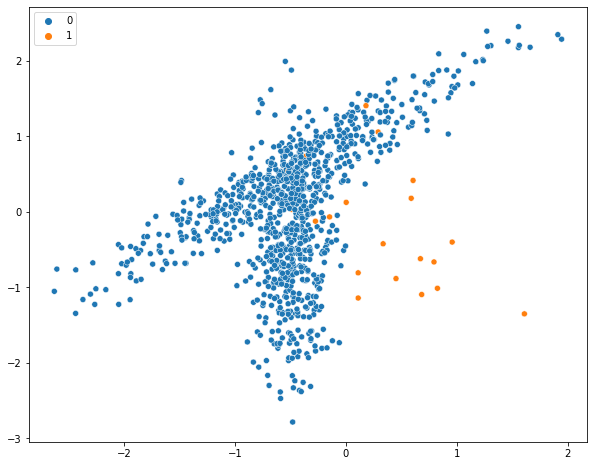

In [151]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,0], x[:,1], hue = y)

In [172]:
type(x)

numpy.ndarray

In [152]:
from sklearn.covariance import EllipticEnvelope

In [153]:
ee = EllipticEnvelope(random_state=0)
y_pred = ee.fit_predict(x) == -1


In [154]:
metrics_(y,y_pred)

Precision: 9.00%, Recall: 45.00% 


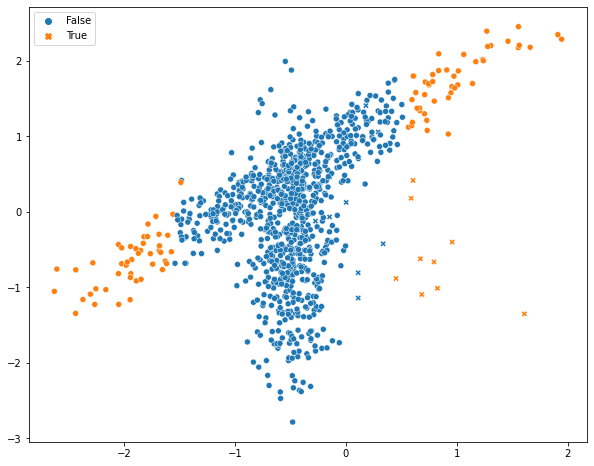

In [155]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,0], x[:,1], hue = y_pred, style= y)

In [156]:
from sklearn.neighbors import LocalOutlierFactor

In [157]:
Loc = LocalOutlierFactor(n_neighbors=20)
y_pred = Loc.fit_predict(x) == -1

In [158]:
metrics_(y, y_pred)

Precision: 34.21%, Recall: 65.00% 


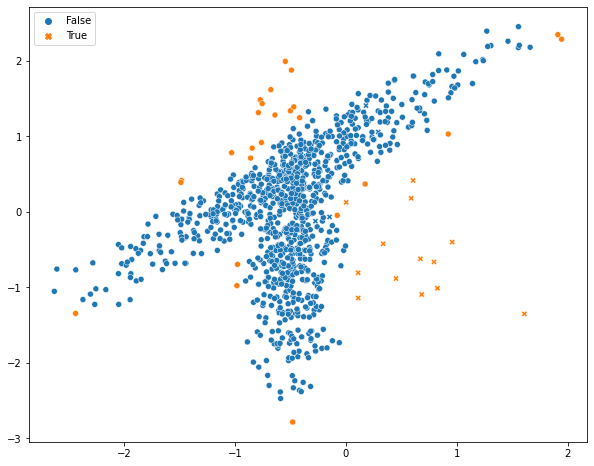

In [159]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,0], x[:,1], hue = y_pred, style= y)

In [160]:
Loc_n = LocalOutlierFactor(n_neighbors=20, novelty=True)

In [161]:
Loc_n.fit(x)

LocalOutlierFactor(novelty=True)

In [162]:
y_pred = Loc_n.predict(x) == -1

In [163]:
metrics_(y, y_pred)

Precision: 38.24%, Recall: 65.00% 


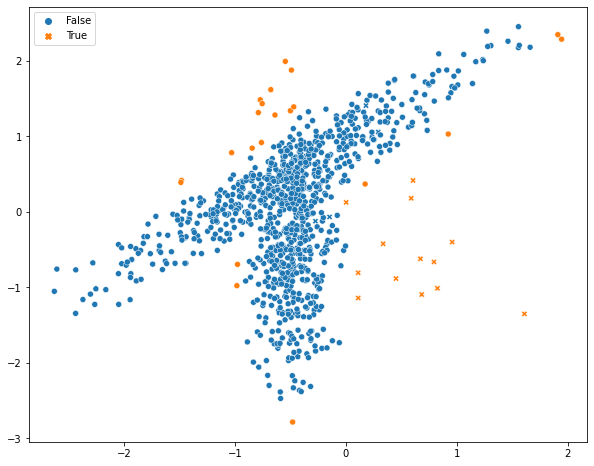

In [164]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,0], x[:,1], hue = y_pred, style= y)

In [165]:
from sklearn.ensemble import IsolationForest

In [166]:
IsF = IsolationForest(n_estimators=200, random_state=1)

In [167]:
y_pred= IsF.fit_predict(x) == -1


In [168]:
metrics_(y,y_pred)

Precision: 6.50%, Recall: 65.00% 


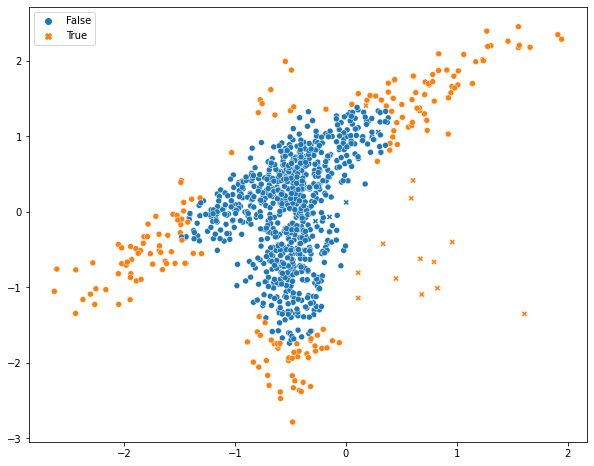

In [103]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,0], x[:,1], hue = y_pred, style= y)

In [170]:
x[:,1]

array([-2.53238402e-01, -7.27853431e-02, -4.30170372e-01,  5.04757957e-01,
       -2.33194257e+00,  2.32092753e-01, -3.68240793e-01, -1.01924541e+00,
        9.97220361e-01, -1.99096500e+00,  8.99935171e-01,  1.32968306e-02,
       -5.11558902e-01,  2.46001564e-01, -8.55570714e-01,  1.66166735e+00,
       -9.36139975e-01, -6.63216623e-01, -3.48571677e-01,  2.28960064e+00,
        3.65826404e-01,  2.37789352e-01, -7.12825293e-02,  5.69447060e-01,
        3.90059327e-01, -3.54556337e-01, -2.87919777e-01, -1.35453496e-01,
        2.68816350e-01,  6.83819736e-01,  2.45587307e-01, -1.58596026e+00,
        3.25358466e-01, -1.29804704e+00, -9.55178350e-01,  1.19175972e+00,
       -5.11901711e-02, -6.74405707e-01,  2.84235269e-01, -1.59054575e+00,
        1.99104461e+00,  5.54222091e-01,  1.34012364e+00,  1.21393370e+00,
        3.04735349e-01, -3.42597073e-01, -1.55574451e+00,  4.11988007e-01,
       -4.13651308e-01, -1.80706508e+00,  4.45283312e-01,  1.11559487e+00,
       -5.08702418e-01,  

In [104]:
from sklearn.datasets import fetch_kddcup99
kddcup99 = fetch_kddcup99(subset='http', percent10=True, random_state=1000)
x = kddcup99['data'].astype(np.float64)
y = kddcup99['target']


In [105]:
x.shape

(58725, 3)

In [106]:
y.shape

(58725,)

In [107]:
 y = np.where(y == b'normal.', 0, 1 )

In [108]:
y

array([0, 0, 0, ..., 0, 0, 0])

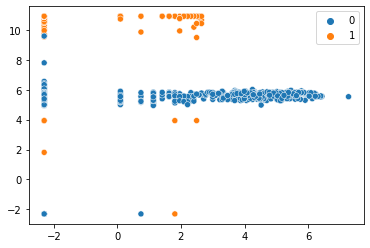

In [109]:
sns.scatterplot(x[:,0], x[:,1], hue = y)

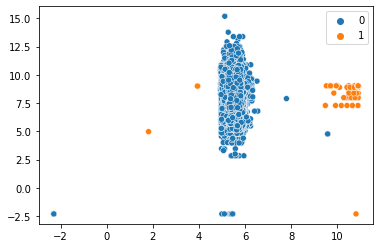

In [110]:
sns.scatterplot(x[:,1], x[:,2], hue = y)

In [111]:
out_d = PercentileDetector(percentile = 0.98)

In [112]:
y_pred=out_d.fit_predict(x)

In [113]:
metrics_(y,y_pred)

Precision: 2.76%, Recall: 1.95% 


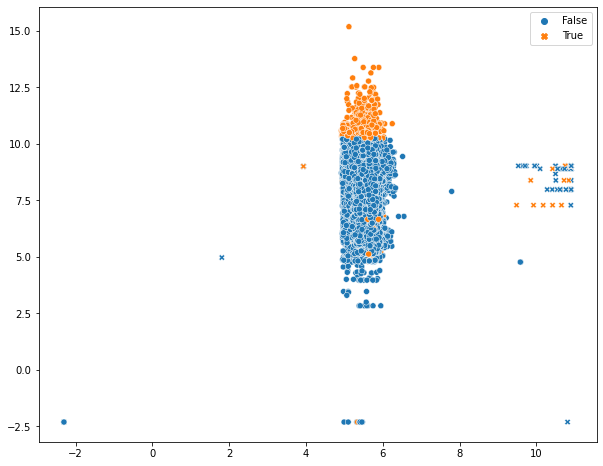

In [114]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,1], x[:,2], hue = y_pred, style= y, y_jitter = True,x_jitter = True)

In [115]:
ele = EllipticEnvelope(random_state = 1)

In [116]:
y_pred = ele.fit_predict(x) == -1

In [117]:
metrics_(y, y_pred)

Precision: 37.61%, Recall: 100.00% 


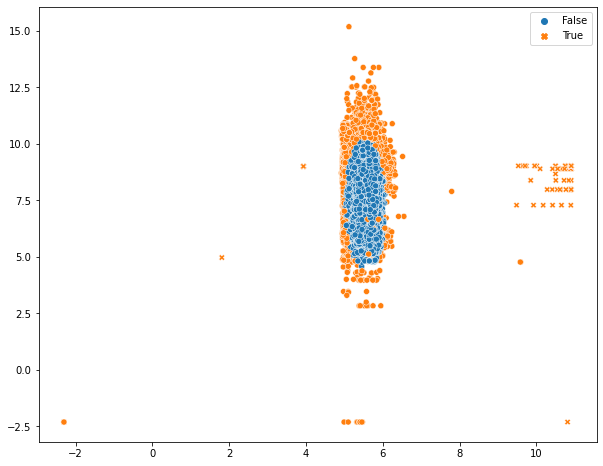

In [118]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,1], x[:,2], hue = y_pred, style= y, y_jitter = True,x_jitter = True)


In [119]:
LOC = LocalOutlierFactor(n_neighbors = 100 )

In [120]:
y_pred = LOC.fit_predict(x) == -1

In [121]:
metrics_(y, y_pred)

Precision: 9.88%, Recall: 5.25% 


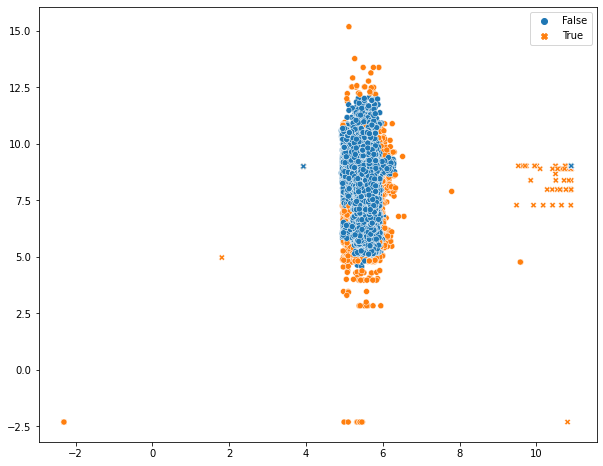

In [122]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,1], x[:,2], hue = y_pred, style= y, y_jitter = True,x_jitter = True)


In [123]:
LOC_n = LocalOutlierFactor(n_neighbors = 100, novelty=True )

In [124]:
LOC_n.fit(x)

LocalOutlierFactor(n_neighbors=100, novelty=True)

In [125]:
y_pred = LOC_n.predict(x) == -1

In [126]:
metrics_(y, y_pred)

Precision: 10.15%, Recall: 5.25% 


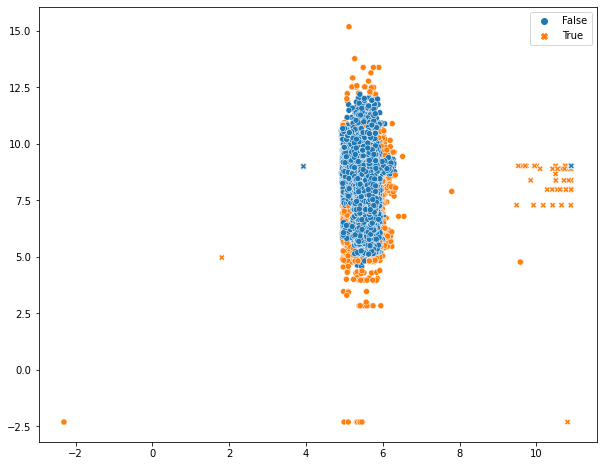

In [127]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,1], x[:,2], hue = y_pred, style= y, y_jitter = True,x_jitter = True)

In [128]:
ISTree = IsolationForest(n_estimators=150, max_features = 2, random_state=1)

In [129]:
 y_pred = ISTree.fit_predict(x) == -1

In [130]:
metrics_(y, y_pred)

Precision: 29.33%, Recall: 100.00% 


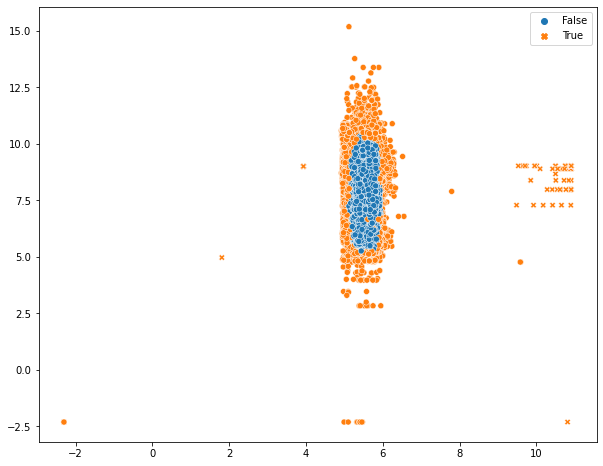

In [131]:
plt.figure(figsize= (10,8))
sns.scatterplot(x[:,1], x[:,2], hue = y_pred, style= y, y_jitter = True,x_jitter = True)

In [132]:
pd.crosstab(y,y_pred)

col_0,False,True
row_0,,
0,51193,5323
1,0,2209
